<a href="https://colab.research.google.com/github/kjamithash/experiments/blob/master/SimpleNet_Fashion_MNSIT_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structure of a Pytorch Deep Learning Model to classify Fashion-MNSIT

## Imports

### Import standard PyTorch modules

In [0]:
import torch
import torch.nn as nn
import torch.utils.data
import torchvision
from torchvision import transforms
from torch.autograd import Variable


### Check PyTorch versions

In [16]:
# check PyTorch versions
print(torch.__version__)
print(torchvision.__version__)

1.4.0
0.5.0


## Data

### Transform definition

In [0]:
img_transforms = transforms.Compose([   
    transforms.ToTensor()
    ])

### Download the dataset

In [0]:
train_dataset = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = img_transforms
)

test_dataset = torchvision.datasets.FashionMNIST(
                  root='./data/FashionMNIST',
                  train=False,
                  transform = img_transforms
)


### Plotting a subset of images

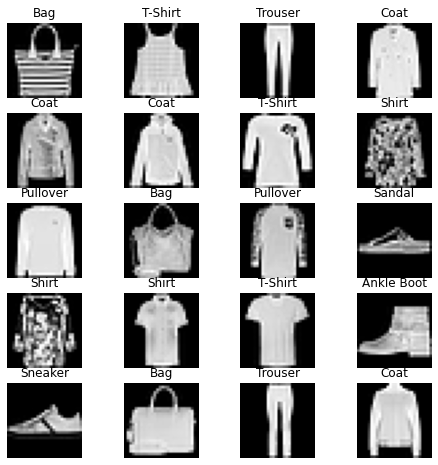

In [52]:
import matplotlib.pyplot as plt
import numpy as np

labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
              
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;

for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    img = train_dataset[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()


### Setting up the dataloaders

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=100,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100,
                                          shuffle=False)

## Network

### Hyperparameters

In [0]:
input_size    = 784   # The image size = 28 x 28 = 784
hidden_size   = 500   # The number of nodes at the hidden layer
num_classes   = 10    # The number of output classes. In this case, from 0 to 9
num_epochs    = 5     # The number of times entire dataset is trained
batch_size    = 100   # The size of input data took for one iteration
learning_rate = 1e-3  # The speed of convergence

### Model

In [0]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()              # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [0]:
simplenet = SimpleNet(input_size, hidden_size, num_classes)

### The optimizer and loss

In [0]:
loss_fcn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(simplenet.parameters(), lr=learning_rate)

### Copy model to GPU

In [36]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")

simplenet.to(device)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

### Training

In [43]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = simplenet(images)                       # Forward pass: compute the output class given a image
        loss = loss_fcn(outputs, labels)                  # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))
            


Epoch [1/5], Step [100/600], Loss: 0.3463
Epoch [1/5], Step [200/600], Loss: 0.3188
Epoch [1/5], Step [300/600], Loss: 0.2975
Epoch [1/5], Step [400/600], Loss: 0.3882
Epoch [1/5], Step [500/600], Loss: 0.3614
Epoch [1/5], Step [600/600], Loss: 0.2993
Epoch [2/5], Step [100/600], Loss: 0.2908
Epoch [2/5], Step [200/600], Loss: 0.3159
Epoch [2/5], Step [300/600], Loss: 0.4392
Epoch [2/5], Step [400/600], Loss: 0.3457
Epoch [2/5], Step [500/600], Loss: 0.2790
Epoch [2/5], Step [600/600], Loss: 0.3595
Epoch [3/5], Step [100/600], Loss: 0.4504
Epoch [3/5], Step [200/600], Loss: 0.2838
Epoch [3/5], Step [300/600], Loss: 0.3398
Epoch [3/5], Step [400/600], Loss: 0.2865
Epoch [3/5], Step [500/600], Loss: 0.2585
Epoch [3/5], Step [600/600], Loss: 0.1966
Epoch [4/5], Step [100/600], Loss: 0.3739
Epoch [4/5], Step [200/600], Loss: 0.2278
Epoch [4/5], Step [300/600], Loss: 0.2336
Epoch [4/5], Step [400/600], Loss: 0.2708
Epoch [4/5], Step [500/600], Loss: 0.3082
Epoch [4/5], Step [600/600], Loss:

### Testing


In [44]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    
    
    outputs = simplenet(images)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels).sum()     # Increment the correct count
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 87 %


### Saving models

In [45]:
torch.save(simplenet, "/tmp/simplenet") 
simplenet = torch.load("/tmp/simplenet")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type SimpleNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [47]:
torch.save(simplenet.state_dict(), "/tmp/simplenet")    
simplenet = SimpleNet(input_size, hidden_size, num_classes)
simplenet_state_dict = torch.load("/tmp/simplenet")
simplenet.load_state_dict(simplenet_state_dict)

<All keys matched successfully>